In [47]:
import numpy as np
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap, MDS
from sklearn.decomposition import PCA, KernelPCA
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.neighbors import NearestNeighbors
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from functools import reduce
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/kj/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/kj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
categ = ['alt.atheism', 'talk.religion.misc', 'soc.religion.christian', 'sci.space']

In [3]:
#my_dataset = fetch_20newsgroups(categories=categ)

In [4]:
my_dataset = fetch_20newsgroups(categories=categ, remove=('headers', 'footers'))

In [14]:
print(my_dataset.data[0])

Chuck Petch writes:

>Now it appears that nothing stands in the way of rebuilding and resuming
>sacrifices, as the Scriptures indicate will happen in the last days.
>Although the Israeli government will give the permission to start, I think
>it is the hand of God holding the project until He is ready to let it
>happen. Brothers and sisters, the time is at hand. Our redemption is
>drawing near. Look up!

How is a scriptural Levitical priesthood resumed?  Are there any Jews who 
can legitimately prove their Levite bloodline?


In [21]:
#words2 = [word_tokenize(a) for a in my_dataset.data]

In [ ]:
#words_list = set(reduce(lambda x1, x2 : x1 + x2, words2))
#print(words_list)

In [53]:
ps = SnowballStemmer('english')
stopWords = set(stopwords.words('english'))
dset = []
for a in my_dataset.data:
    stopped_words = [w for w in word_tokenize(a) if w not in stopWords]
    stemmed_words = [ps.stem(w) for w in stopped_words]
    re = ""
    for sw in stemmed_words:
        re+=sw + " "
    dset.append(re)
    
print(dset[0])

chuck petch write : > now appear noth stand way rebuild resum > sacrific , scriptur indic happen last day . > although isra govern give permiss start , i think > hand god hold project he readi let > happen . brother sister , time hand . our redempt > draw near . look ! how scriptur levit priesthood resum ? are jew legitim prove levit bloodlin ? 


In [54]:
vectorizer = TfidfVectorizer(stop_words='english', min_df=5)
vectors = vectorizer.fit_transform(dset)

In [55]:
print(vectors.shape)

(2049, 5423)


In [56]:
X = vectors.toarray()
Y = my_dataset.target
LABELS = my_dataset.target_names

In [57]:
x_dim30 = PCA(n_components=30).fit_transform(X)
print(x_dim30.shape)

(2049, 30)


In [60]:
def show_chart(points, classes, labels, figsize=(12, 12)):
    target_ids = range(len(labels))

    plt.figure(figsize=figsize)
    for i, label in zip(target_ids, labels):
        plt.scatter(points[classes==i, 0], points[classes==i, 1], label=label)

    plt.legend()
    plt.show()

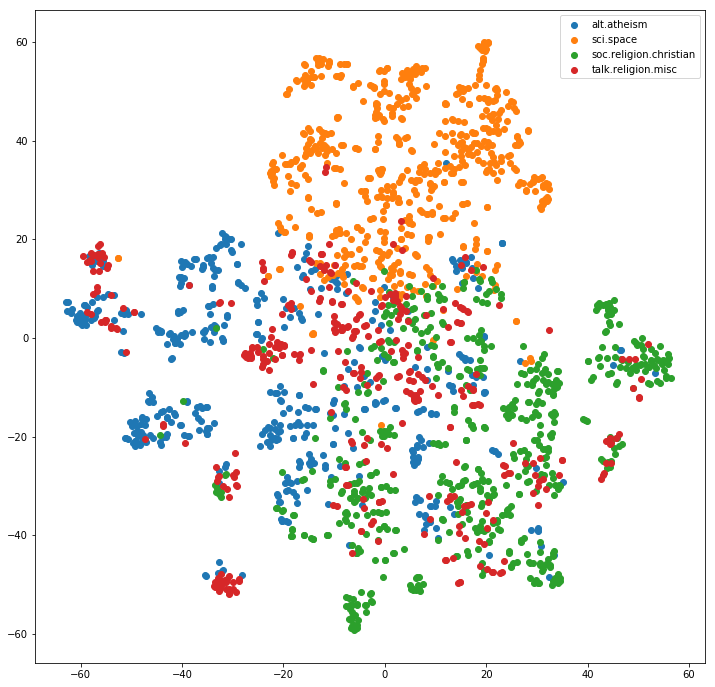

In [61]:
bhsne = TSNE(method='barnes_hut')
x_dim30_bhsne = bhsne.fit_transform(x_dim30)
show_chart(x_dim30_bhsne, Y, LABELS)